# Linear Regression Regularization - Lasso, Rigdge and ElasticNet

Regularization in linear regression is a technique used to prevent overfitting by adding a penalty term to the loss function. The two most common types of regularization are **Ridge Regression (L2 regularization)** and **Lasso Regression (L1 regularization)**.

### Why Regularization?

In linear regression, overfitting occurs when the model fits the training data too closely, capturing noise and fluctuations that don't generalize well to new data. This often happens when the model has too many features or when the features are highly correlated.

Regularization helps by discouraging the model from fitting the training data too closely, effectively reducing the model complexity.

### Types of Regularization

1. **Ridge Regression (L2 Regularization):**
   - Adds a penalty equal to the square of the magnitude of coefficients.
   - It tends to shrink coefficients but doesn't set them exactly to zero, which means it retains all the features but reduces their impact.


   **Formula:**
   
   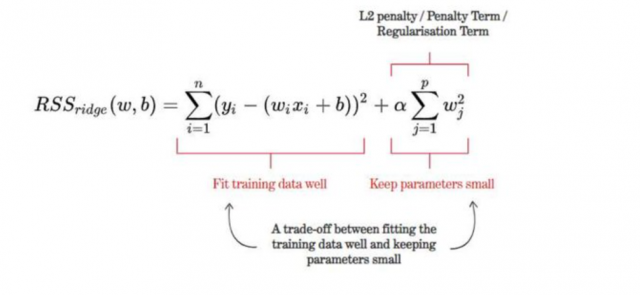
   
   **Example Scenario:**
   Imagine you're predicting car prices based on various features like Engine size, horsepower, lenght, width, etc. If some features have small but non-zero effects on the price, you don't want to remove them entirely. Ridge regression will shrink their coefficients, reducing their impact without eliminating them.

2. **Lasso Regression (L1 Regularization):**
   - Adds a penalty equal to the absolute value of the magnitude of coefficients.
   - It can shrink some coefficients to zero, effectively performing feature selection.

  
   **Formula:**
   
   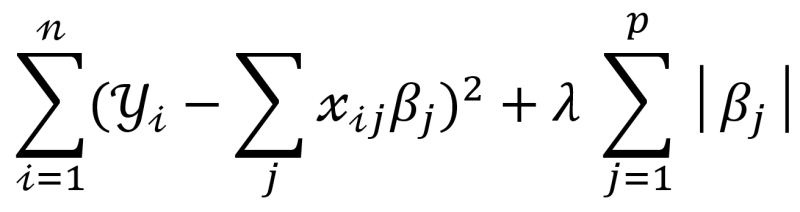
   
   **Example Scenario:**
   Suppose you're predicting the same car prices, but this time you have many irrelevant features (like the color of the car). Lasso regression can set the coefficients of these irrelevant features to zero, effectively ignoring them, which simplifies the model.

### When to Use Each?

- **Ridge Regression:** Use when you have many features that are potentially relevant and you want to retain all of them but control their influence to prevent overfitting.
- **Lasso Regression:** Use when you suspect that many of the features are irrelevant or have very little influence. Lasso can help in automatically selecting the most important features.

### Example with Data

Let's say you have the following dataset to predict car prices:

| Feature        | Coefficient (OLS) |
|----------------|-------------------|
| Engine Size    | 10.5              |
| Horsepower     | 8.2               |
| Length         | 0.5               |
| Width          | 4.0               |
| Fuel Efficiency| -0.1              |
| Color          | 0.01              |

In an ordinary least squares (OLS) regression, you might find that "Color" has a very small coefficient, which suggests it has almost no impact on price. However, OLS doesn't penalize this small coefficient, so it remains in the model.

- **Ridge Regression** might shrink this coefficient to an even smaller value but won't eliminate it entirely.
- **Lasso Regression** might set the coefficient for "Color" to exactly zero, effectively removing it from the model.


### Conclusion

- **Ridge Regression** is useful when all features are expected to contribute to the outcome, but you want to control their influence.
- **Lasso Regression** is better when you want to perform feature selection, ignoring irrelevant or less important features.

# Importing Basic Libraries and Describing Dataset

In [4]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None)

In [5]:
import warnings
warnings.filterwarnings('ignore')

DataSet Link - https://www.kaggle.com/code/snehac47/car-price-prediction-linear-regression-assignment/input

In [6]:
df = pd.read_csv("CarPrice_Assignment.csv")

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

Here's the description of car dataset:

1. **`car_ID`:** A unique identifier for each car in the dataset. This is usually a numeric or alphanumeric code.

2. **`symboling`:** A numeric value that represents the car's insurance risk rating. A higher value typically indicates a riskier car from an insurance perspective.

3. **`CarName`:** The name or model of the car, which often includes the manufacturer's name.

4. **`fueltype`:** The type of fuel the car uses, typically either 'gas' or 'diesel'.

5. **`aspiration`:** Refers to the type of engine aspiration system, such as 'std' (standard) or 'turbo' (turbocharged).

6. **`doornumber`:** The number of doors on the car, usually 'two' or 'four'.

7. **`carbody`:** The body style of the car, such as 'sedan', 'hatchback', 'convertible', etc.

8. **`drivewheel`:** The type of drivetrain the car uses, such as 'fwd' (front-wheel drive), 'rwd' (rear-wheel drive), or '4wd' (four-wheel drive).

9. **`enginelocation`:** The location of the engine in the car, either 'front' or 'rear'.

10. **`wheelbase`:** The distance between the centers of the front and rear wheels, typically measured in inches or millimeters.

11. **`carlength`:** The overall length of the car from the front to the rear, usually measured in inches or millimeters.

12. **`carwidth`:** The overall width of the car, usually measured in inches or millimeters.

13. **`carheight`:** The overall height of the car, usually measured in inches or millimeters.

14. **`curbweight`:** The weight of the car without passengers or cargo, usually measured in pounds or kilograms.

15. **`enginetype`:** The type of engine the car has, such as 'ohc' (overhead cam), 'ohcf', 'dohc' (dual overhead cam), etc.

16. **`cylindernumber`:** The number of cylinders in the car's engine, which can affect the car's performance and fuel efficiency.

17. **`enginesize`:** The displacement of the engine, typically measured in cubic centimeters (cc) or liters, which indicates the engine's size.

18. **`fuelsystem`:** The type of fuel system used in the car, such as 'mpfi' (multi-point fuel injection), '2bbl', '4bbl', etc.

19. **`boreratio`:** The ratio of the bore (cylinder diameter) to the stroke (distance the piston travels), which influences the engine's characteristics.

20. **`stroke`:** The distance the piston travels within the cylinder, affecting the engine's torque and power output.

21. **`compressionratio`:** The ratio of the volume of the cylinder when the piston is at the bottom of its stroke to when it is at the top. A higher compression ratio typically indicates more power and efficiency.

22. **`horsepower`:** The power output of the engine, usually measured in horsepower (hp).

23. **`peakrpm`:** The engine speed at which the maximum horsepower is generated, measured in revolutions per minute (RPM).

24. **`citympg`:** The car's fuel efficiency in miles per gallon (mpg) when driving in a city environment.

25. **`highwaympg`:** The car's fuel efficiency in miles per gallon (mpg) when driving on highways.

26. **`price`:** The price of the car, typically in US dollars, representing the car's market value or selling price.

These columns capture a wide range of information about each car, from its physical dimensions and engine specifications to its fuel efficiency and market price.

In [9]:
len(df.columns)

26

In [10]:
df = df.drop(['car_ID','CarName'],axis=1)

# Exploring the data

#### Let's visualize categorical column data 

Categorical Columns in data are: ['Model', 'Metric']


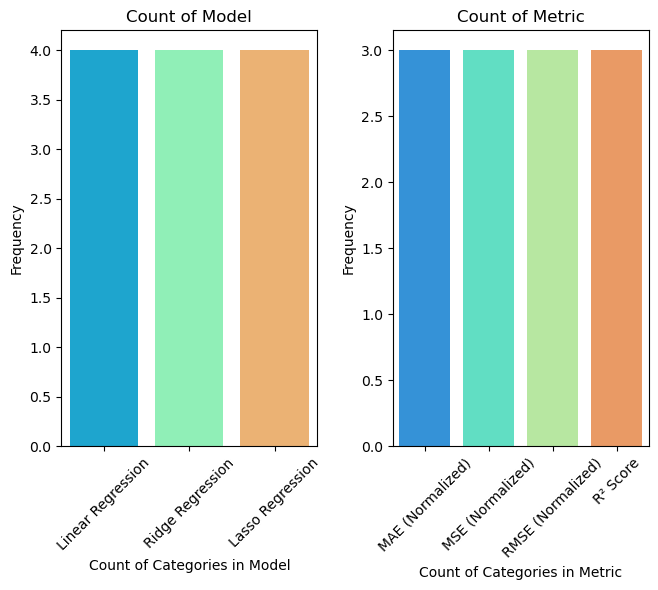

In [279]:
categorical_cols = [col for col in df.columns if df[col].dtype == 'object']
print('Categorical Columns in data are:', categorical_cols)

num_cols = 3
num_rows = int(np.ceil(len(categorical_cols) / num_cols))  


fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 6 * num_rows))
axes = axes.flatten()

for i, col in enumerate(categorical_cols):
    sns.countplot(data=df, x=col, palette='rainbow', ax=axes[i])
    axes[i].set_xlabel(f'Count of Categories in {col}')
    axes[i].set_ylabel('Frequency')
    axes[i].set_title(f'Count of {col}')
    axes[i].tick_params(axis='x', rotation=45)  

for j in range(len(categorical_cols), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

#### Let's Visualize Dependent Feature

<Axes: ylabel='Density'>

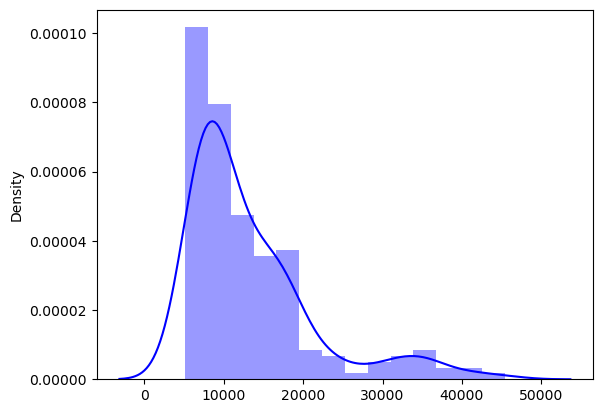

In [15]:
sns.distplot(x = df['price'],color = 'blue')

# Data Preprocessing

#### By using the map() function, you've replaced the categorical values in the 'cylindernumber' and 'doornumber' column with their corresponding numerical values. 

In [18]:
df['cylindernumber'] = df['cylindernumber'].map({'four':4, 'six':6, 'five':5, 'eight':8,'two':2,'three':3,'twelve':12})
df['doornumber'] = df['doornumber'].map({'four':4, 'two':2})

#### Utilizing a label encoder to transform categorical columns into numerical representations, while also capturing the resulting mapped values.

In [20]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le_encoded_cols = ['enginetype','fuelsystem','drivewheel','aspiration','fueltype','symboling','enginelocation', 'carbody']

for i in le_encoded_cols:
    df[i] = le.fit_transform(df[i])
    mapping = dict(zip(le.classes_, le.transform(le.classes_)))
    print(f'Mapped for {i} : {mapping}')

Mapped for enginetype : {'dohc': 0, 'dohcv': 1, 'l': 2, 'ohc': 3, 'ohcf': 4, 'ohcv': 5, 'rotor': 6}
Mapped for fuelsystem : {'1bbl': 0, '2bbl': 1, '4bbl': 2, 'idi': 3, 'mfi': 4, 'mpfi': 5, 'spdi': 6, 'spfi': 7}
Mapped for drivewheel : {'4wd': 0, 'fwd': 1, 'rwd': 2}
Mapped for aspiration : {'std': 0, 'turbo': 1}
Mapped for fueltype : {'diesel': 0, 'gas': 1}
Mapped for symboling : {-2: 0, -1: 1, 0: 2, 1: 3, 2: 4, 3: 5}
Mapped for enginelocation : {'front': 0, 'rear': 1}
Mapped for carbody : {'convertible': 0, 'hardtop': 1, 'hatchback': 2, 'sedan': 3, 'wagon': 4}


#### Deifining X and y varaible as independent and dependent variable.

In [22]:
X = df.drop(['price'], axis=1)
y = df['price']

In [125]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 30)

# Model 1 - LinearRegression

In [129]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression(fit_intercept=True)
lr_model = lr.fit(X_train, y_train)

In [131]:
lr_model.score(X_train, y_train)

0.9115927506470686

In [134]:
lr_model.score(X_test, y_test)

0.41986693547194787

#### Let's check the model prediction in predicted data

In [139]:
y_pred_lr = lr_model.predict(X_test)

In [141]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
mae = mean_absolute_error(y_test, y_pred_lr)
print(f"Mean Absolute Error (MAE): {mae:.4f}")

mse = mean_squared_error(y_test, y_pred_lr)
print(f"Mean Squared Error (MSE): {mse:.4f}")

rmse = mse ** 0.5
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")

r2 = r2_score(y_test, y_pred_lr)
print(f"R² Score: {r2:.6f}")

Mean Absolute Error (MAE): 3105.7370
Mean Squared Error (MSE): 26566944.2386
Root Mean Squared Error (RMSE): 5154.3132
R² Score: 0.419867


# Model 2 - Ridge Regression (R2 Regularization Regression)

In [146]:
from sklearn.linear_model import Ridge
ridge_reg= Ridge(alpha=10, max_iter=100, tol=0.1,fit_intercept= True) 
ridge_reg.fit(X_train, y_train)

Ridge(alpha=10, max_iter=100, tol=0.1)

- **`alpha=10`**: Strong regularization.
- **`max_iter=100`**: Up to 100 iterations for convergence.
- **`tol=0.1`**: Convergence threshold.
- **`fit_intercept=True`**: Include an intercept term in the model. 

These parameters control how the Ridge regression model is trained and how it balances between fitting the training data and generalizing to new data.

In [149]:
ridge_reg.score(X_train, y_train)

0.8880183298746243

In [151]:
ridge_reg.score(X_test, y_test)

0.6450198927518658

#### Let's check the model prediction in predicted data

In [154]:
y_pred_ridge = ridge_reg.predict(X_test)

In [156]:
mae_ridge = mean_absolute_error(y_test, y_pred_ridge)
print(f"Mean Absolute Error (MAE): {mae_ridge:.4f}")

mse_ridge = mean_squared_error(y_test, y_pred_ridge)
print(f"Mean Squared Error (MSE): {mse_ridge:.4f}")

rmse_ridge = mse_ridge ** 0.5
print(f"Root Mean Squared Error (RMSE): {rmse_ridge:.4f}")

r2_ridge = r2_score(y_test, y_pred_ridge)
print(f"R² Score: {r2_ridge:.6f}")

Mean Absolute Error (MAE): 2393.6859
Mean Squared Error (MSE): 16256161.3735
Root Mean Squared Error (RMSE): 4031.8930
R² Score: 0.645020


# Model 3 - Lasso Regression (L1 Reguarization Regression)

In [159]:
from sklearn import linear_model
lasso_reg = linear_model.Lasso(alpha=1, max_iter=100, fit_intercept= True, selection = 'random')
lasso_reg.fit(X_train,y_train)

Lasso(alpha=1, max_iter=100, selection='random')

- **`alpha=1`**: Applies moderate regularization to prevent overfitting and perform feature selection.
- **`max_iter=100`**: Limits the optimization process to 100 iterations, balancing convergence with computation time.
- **`fit_intercept=True`**: Includes an intercept in the model, making it more flexible in fitting data not centered around the origin.
- **`selection='random'`**: Randomly selects coefficients to update in each iteration, which can improve convergence in some cases.

These parameters allow you to control how the Lasso regression model fits your data, balancing regularization, convergence, and computational efficiency.

In [161]:
lasso_reg.score(X_train, y_train)

0.9109083514728215

In [163]:
lasso_reg.score(X_test, y_test)

0.5015474268007605

#### Let's check the model prediction in predicted data

In [165]:
y_pred_lasso = lasso_reg.predict(X_test)

In [167]:
mae_lasso = mean_absolute_error(y_test, y_pred_lasso)
print(f"Mean Absolute Error (MAE): {mae_lasso:.4f}")

mse_lasso = mean_squared_error(y_test, y_pred_lasso)
print(f"Mean Squared Error (MSE): {mse_lasso:.4f}")

rmse_lasso = mse_lasso ** 0.5
print(f"Root Mean Squared Error (RMSE): {rmse_lasso:.4f}")

r2_lasso = r2_score(y_test, y_pred_lasso)
print(f"R² Score: {r2_lasso:.6f}")

Mean Absolute Error (MAE): 2901.3638
Mean Squared Error (MSE): 22826421.2600
Root Mean Squared Error (RMSE): 4777.7004
R² Score: 0.501547


### Lets vizualise r2 errors of models

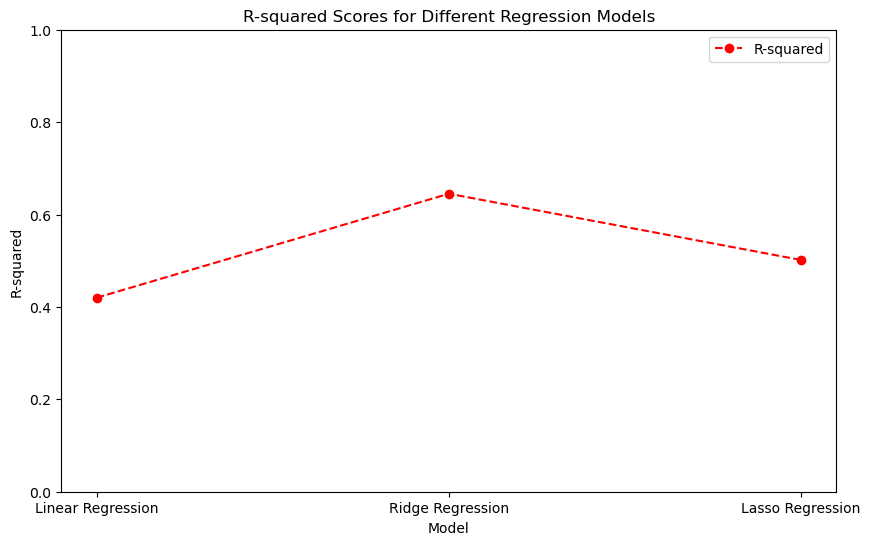

In [264]:
models = ['Linear Regression', 'Ridge Regression', 'Lasso Regression']
r2_values = [r2, r2_ridge, r2_lasso]


plt.figure(figsize=(10, 6))
plt.plot(models, r2_values, marker='o', linestyle='--', color='r', label='R-squared')
plt.title('R-squared Scores for Different Regression Models')
plt.xlabel('Model')
plt.ylabel('R-squared')
plt.ylim(0, 1)
plt.legend()
plt.show()

# Compairative Summary



| **Model**             | **Training R² Score** | **Testing R² Score** | **Mean Absolute Error (MAE)** | **Mean Squared Error (MSE)** | **Root Mean Squared Error (RMSE)** |
|-----------------------|-----------------------|----------------------|-------------------------------|------------------------------|------------------------------------|
| **Linear Regression** | 0.9116                | 0.4199               | 3105.7370                      | 26566944.2386                 | 5154.3132                         |
| **Ridge Regression**  | 0.8880                | 0.6450               | 2393.6859                      | 16256161.3735                 | 4031.8930                         |
| **Lasso Regression**  | 0.9109                | 0.5015               | 2901.3638                      | 22826421.2600                 | 4777.7004                         |


### Comparative Report: Linear, Ridge, and Lasso Regression Models

#### 1. **Model Performance Overview**
- **Linear Regression**: 
  - Exhibits strong performance on the training data (R² = 0.9116), but significantly underperforms on the testing data (R² = 0.4199), indicating overfitting.
  - Error metrics (MAE = 3105.7370, RMSE = 5154.3132) are the highest among the three models, showing poor prediction accuracy on unseen data.

- **Ridge Regression**: 
  - Shows a balanced performance with a good fit on training data (R² = 0.8880) and the best generalization to testing data (R² = 0.6450).
  - It achieves the lowest error metrics (MAE = 2393.6859, RMSE = 4031.8930), making it the most reliable model for predictions on new data.

- **Lasso Regression**:
  - Performs similarly to linear regression on the training data (R² = 0.9109) but better on the testing data (R² = 0.5015).
  - The error metrics (MAE = 2901.3638, RMSE = 4777.7004) are intermediate, better than linear regression but not as strong as Ridge regression.

#### 2. **Key Insights**
- **Overfitting**: Linear regression overfits the data, as seen from the large drop in R² from training to testing. Both Ridge and Lasso regression help reduce overfitting, with Ridge showing the best generalization.
- **Prediction Accuracy**: Ridge regression outperforms both linear and Lasso in terms of lower error metrics and higher testing R², making it the most accurate model for your dataset.

#### 3. **Conclusion**
- **Best Model**: Ridge regression is the most robust and accurate model, balancing training performance with strong generalization to new data.
- **Consideration**: If simplicity and model interpretability are key, Lasso regression may still be preferable due to its ability to perform feature selection, though at a slight cost to accuracy.